# Analysis of Ariane Qualitative Runs

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt, animation
import xarray as xr
import numpy as np
import pandas as pd
import cmocean as cm
from datetime import datetime
from IPython.display import HTML
import netCDF4 as nc
from cartopy import crs, feature
from salishsea_tools import geo_tools

## load CIOPS mesh

In [2]:
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

## test run with SalishSeaCast

In [16]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_qual/og_W_noSSH_forward_01mar19/ariane_trajectories_qualitative.nc')
file2 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_qual/og_now_nossh_forward_01mar19/ariane_trajectories_qualitative.nc')
file3 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_qual/new_now_nossh_forward_01mar19/ariane_trajectories_qualitative.nc')

In [12]:
# working with ssh files!?
file4 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_qual/og_newssh_forward_01mar19/ariane_trajectories_qualitative.nc')
file5 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_qual/tidesback_newssh_forward_01mar19/ariane_trajectories_qualitative.nc')

Text(0, 0.5, 'lat')

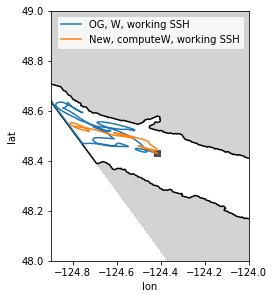

In [17]:
# 2D
fig, ax = plt.subplots(1,1,figsize=(8,4.6))

ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-124.9, -124])
ax.set_ylim([48, 49])
ax.set_aspect(5/4.4)

# ax.plot(file.traj_lon,file.traj_lat,label='OG, W, no SSH')
# ax.plot(file2.traj_lon,file2.traj_lat,label='OG, no W, no SSH')
# ax.plot(file3.traj_lon,file3.traj_lat,label='New, no W, no SSH')
ax.plot(file4.traj_lon,file4.traj_lat,label='OG, W, working SSH')
ax.plot(file5.traj_lon,file5.traj_lat,label='New, computeW, working SSH')
ax.scatter(file4.traj_lon[0],file4.traj_lat[0],color='0.30',marker='s')
ax.legend()

ax.set_xlabel('lon')
ax.set_ylabel('lat')

Text(0.5, 0, 'time')

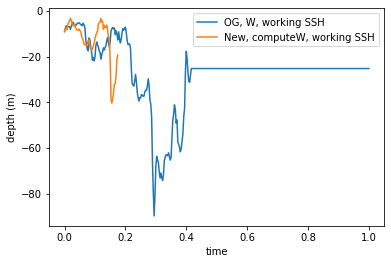

In [18]:
plt.plot(file4.traj_time, file4.traj_depth,label='OG, W, working SSH')
plt.plot(file5.traj_time, file5.traj_depth,label='New, computeW, working SSH')
plt.legend()
plt.ylabel("depth (m)")
plt.xlabel("time")

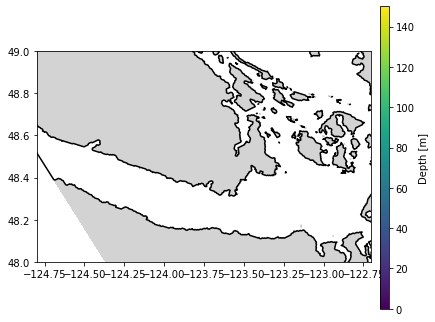

In [4]:
# Make initial animation figure
file = file4
fig, ax = plt.subplots(figsize=(6, 6))
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
l = ax.scatter([], [], s=50, c=[], vmin=0, vmax=150, edgecolor='k')
t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-124.8, -122.7])
ax.set_ylim([48, 49])
ax.set_aspect(1/np.sin(np.deg2rad(49)))
fig.colorbar(l, cax=cax, label='Depth [m]')

# Init function
def init():
    t.set_text('')
    l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l, t,

# Animate function
def animate(hour):
    l.set_offsets(np.vstack([file.traj_lon[hour,:], file.traj_lat[hour,:]]).T)
    l.set_array(file.traj_depth[hour,:])
    return l,t ,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(file.nb_output)-1, interval=100, blit=True)

In [5]:
HTML(anim.to_html5_video())

## CIOPS BC12
#### first: lets make some smart choices about where to put the particles!

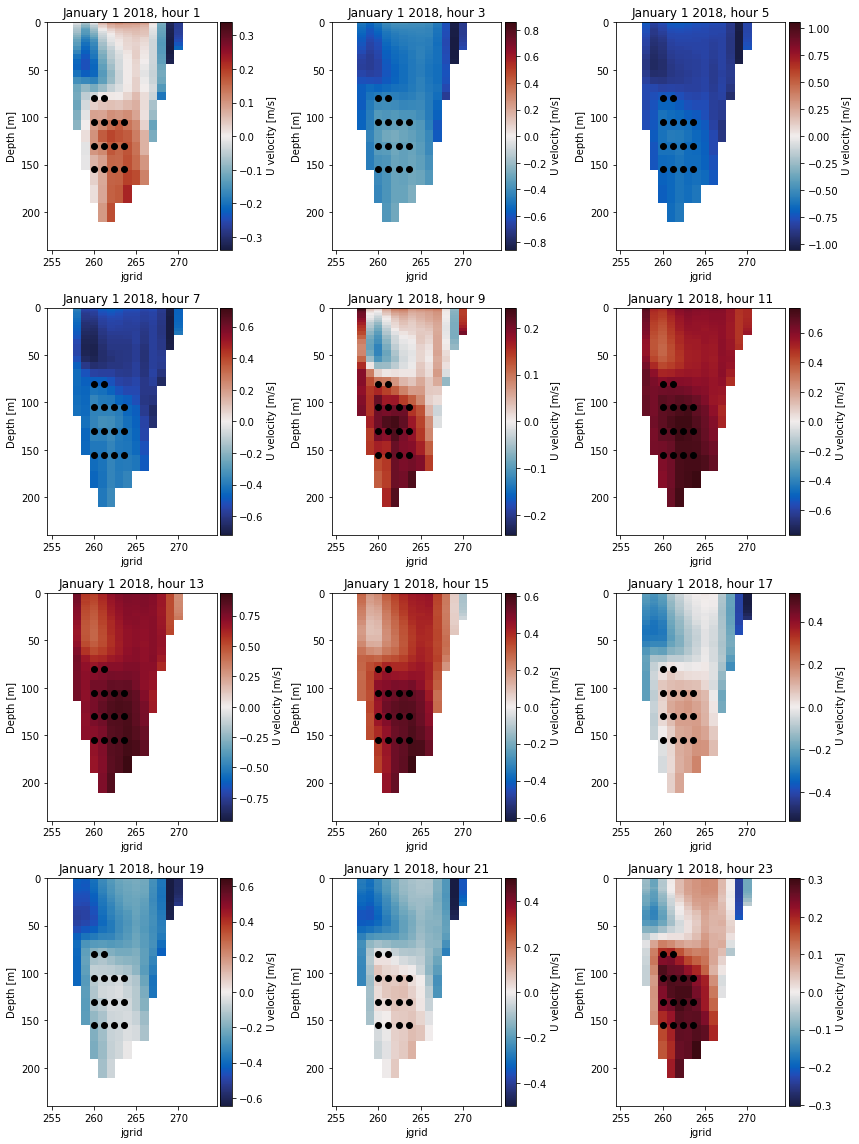

In [4]:
nc_file = "/ocean/rbeutel/data/201701/U_new_20170101.nc"
nc_to_plot = nc.Dataset(nc_file)
mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# hours = [0, 3, 6, 12, 15, 18, 21, 24]
hours = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

variable = 'vozocrtx'
fig, ax= plt.subplots(nrows=4, ncols=3, figsize =(12,16))

igrid = 646-1
latS = 255
latN = 275
k = 0

for hour in hours:
    data = nc_to_plot[variable][hour,:,latS:latN,igrid]
    # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
    section_slice = np.arange(latS,latN)
    zlevels = mesh_nc['gdept_1d'][:][0]
    X, Y = np.meshgrid(section_slice, zlevels)
    tmesh = ax[hour//6,k].pcolormesh(X,Y,data, cmap = cm.cm.balance, \
                          vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))

    ax[hour//6,k].set_ylim([0,240])
    ax[hour//6,k].invert_yaxis()
    ax[hour//6,k].set_ylabel('Depth [m]')
    ax[hour//6,k].set_xlabel('jgrid')
    ax[hour//6,k].set_title('January 1 2018, hour '+str(hour+1))
    
    cbar = fig.colorbar(tmesh, ax=ax[hour//6,k], orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
    cbar.set_label(label=' U velocity [m/s]') 
    
    # particle location evenly arangedthrough lower half of water column
#     ax[hour//6,k].scatter([260,260,260,262.3,262.3,262.3,262.3,264.7,264.7,264.7,264.7,267,267,267],[90,120,150, 90,120, 150, 180, 90,120, 150, 180,90, 120, 150],c='k')
    # particle location focused in area of high influx (from SSC JR CSs)
    ax[hour//6,k].scatter([260,260,260,260,261.2,261.2,261.2,261.2,262.4,262.4,262.4,263.6,263.6,263.6],[80,105,130,155,80,105,130,155,105,130,155,105,130,155],c='k')
    #once i get CIOPS to work i honestly think i should do both particle location schemes
    
    if k ==2:
        k = 0
    else:
        k +=1 
    
plt.tight_layout()

# ax[1].scatter([261,261,261,263.5,263.5,263.5,263.5,266,266,266],[90,120,150, 90,120, 150, 180, 90, 120, 150],c='k')

In [10]:
#now for ariane you cannot set the position at a depth of 90 bc that will put it incell 90 (which doesn't exist)
#instead find with depth grid cell that best corresponds with the positions you chose above
[(x,y) for (x,y) in enumerate(zlevels)]

[(0, 0.507530023512452),
 (1, 1.557569488842656),
 (2, 2.6693409194084996),
 (3, 3.857884935301262),
 (4, 5.141913831146915),
 (5, 6.544535333853228),
 (6, 8.093971465979628),
 (7, 9.824157673695284),
 (8, 11.775044353140647),
 (9, 13.992364711100425),
 (10, 16.52661505451083),
 (11, 19.43106879090391),
 (12, 22.758861118719427),
 (13, 26.559531476793033),
 (14, 30.875785062827266),
 (15, 35.74142752531527),
 (16, 41.181253706626364),
 (17, 47.21313511579986),
 (18, 53.85189559955382),
 (19, 61.11412039354691),
 (20, 69.02298960174267),
 (21, 77.61249605846115),
 (22, 86.93079063628434),
 (23, 97.04271072951805),
 (24, 108.03171341445899),
 (25, 120.0014691078047),
 (26, 133.0773268246376),
 (27, 147.4077864359136),
 (28, 163.16603544640805),
 (29, 180.55153922041305),
 (30, 199.79161550620404),
 (31, 221.14287374964496),
 (32, 244.8923539986389),
 (33, 271.3581577853082),
 (34, 300.8893252934304),
 (35, 333.8646831888884),
 (36, 370.6903722478645),
 (37, 411.79577220550027),
 (38, 457

SO 90 m=22, 120 m=25, 150 m=27, and 180 m=29

In [2]:
file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/forward_01mar17/ariane_trajectories_qualitative.nc')

Text(0, 0.5, 'lat')

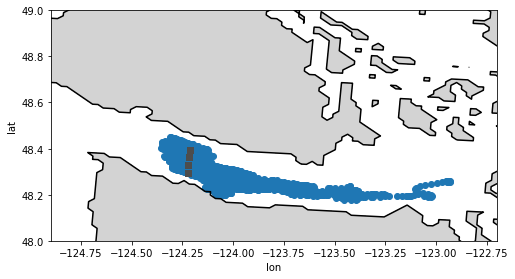

In [12]:
# 2D
fig, ax = plt.subplots(1,1,figsize=(8,4.6))

ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-124.9, -122.7])
ax.set_ylim([48, 49])
ax.set_aspect(5/4.4)

ax.scatter(file.traj_lon,file.traj_lat)
ax.scatter(file.traj_lon[0],file.traj_lat[0],color='0.30',marker='s')

ax.set_xlabel('lon')
ax.set_ylabel('lat')

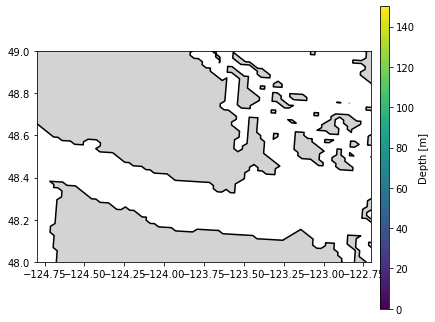

In [13]:
# Make initial animation figure
fig, ax = plt.subplots(figsize=(6, 6))
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
l = ax.scatter([], [], s=50, c=[], vmin=0, vmax=150, edgecolor='k')
t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-124.8, -122.7])
ax.set_ylim([48, 49])
ax.set_aspect(1/np.sin(np.deg2rad(49)))
fig.colorbar(l, cax=cax, label='Depth [m]')

# Init function
def init():
    t.set_text('')
    l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l, t,

# Animate function
def animate(hour):
#     tstamp = file.traj_time[hour, 0].values.astype('datetime64[s]').astype(datetime)
#     t.set_text(tstamp.strftime('%Y-%b-%d %H:%M UTC'))
    l.set_offsets(np.vstack([file.traj_lon[hour,:], file.traj_lat[hour,:]]).T)
    l.set_array(file.traj_depth[hour,:])
    return l, t,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(file.nb_output)-1, interval=100, blit=True)

In [14]:
HTML(anim.to_html5_video())

In [15]:
file.traj_depth[:,0]

<xarray.DataArray 'traj_depth' (nb_output: 241)>
array([-102.421585, -100.559929, -102.398514, ...,  -77.736279,  -75.82184 ,
        -76.703534])
Dimensions without coordinates: nb_output
Attributes:
    title:     What is traj_depth ?
    longname:  Trajectory: z positions
    units:     No dimension

### now with backwards!?

In [3]:
def plt_qual_2D(month, year,ax):
    
    n = 14 #number of particles being tracked
    
    if month == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    
    # Bathymetry
    c = ax.contourf(
    mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.deep, extend='max',zorder=0,
    )
    
    # "Mapping"
    ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
    ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=2)
    ax.set_xlim([-126.7, -123.7])
    ax.set_ylim([47.5, 49.5])
    ax.set_aspect(1/np.sin(np.deg2rad(49)))
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    
    
    # Particle trajectories and depth
    im = ax.scatter(file.traj_lon,file.traj_lat, c=file.traj_depth, vmax=0, vmin=-100, cmap=cm.cm.solar, s=10,zorder=3)
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal')
    ax.scatter(file.traj_lon[0],file.traj_lat[0],color='0.30',marker='s', zorder=4) # start location
    
    # End locations
    last_point= [pd.DataFrame(file.traj_lat[:,i]).last_valid_index() for i in range(n)]
    k=0
    for i in range(n):
        if last_point[i] < len(file.traj_lat)-2:
            k+=1
            ax.scatter(file.traj_lon[last_point[i],i],file.traj_lat[last_point[i],i],color='r',marker='*', zorder=4)
            
    ax.set_title(month + "\nparticles leaving surface = "+str(k), fontsize=16)

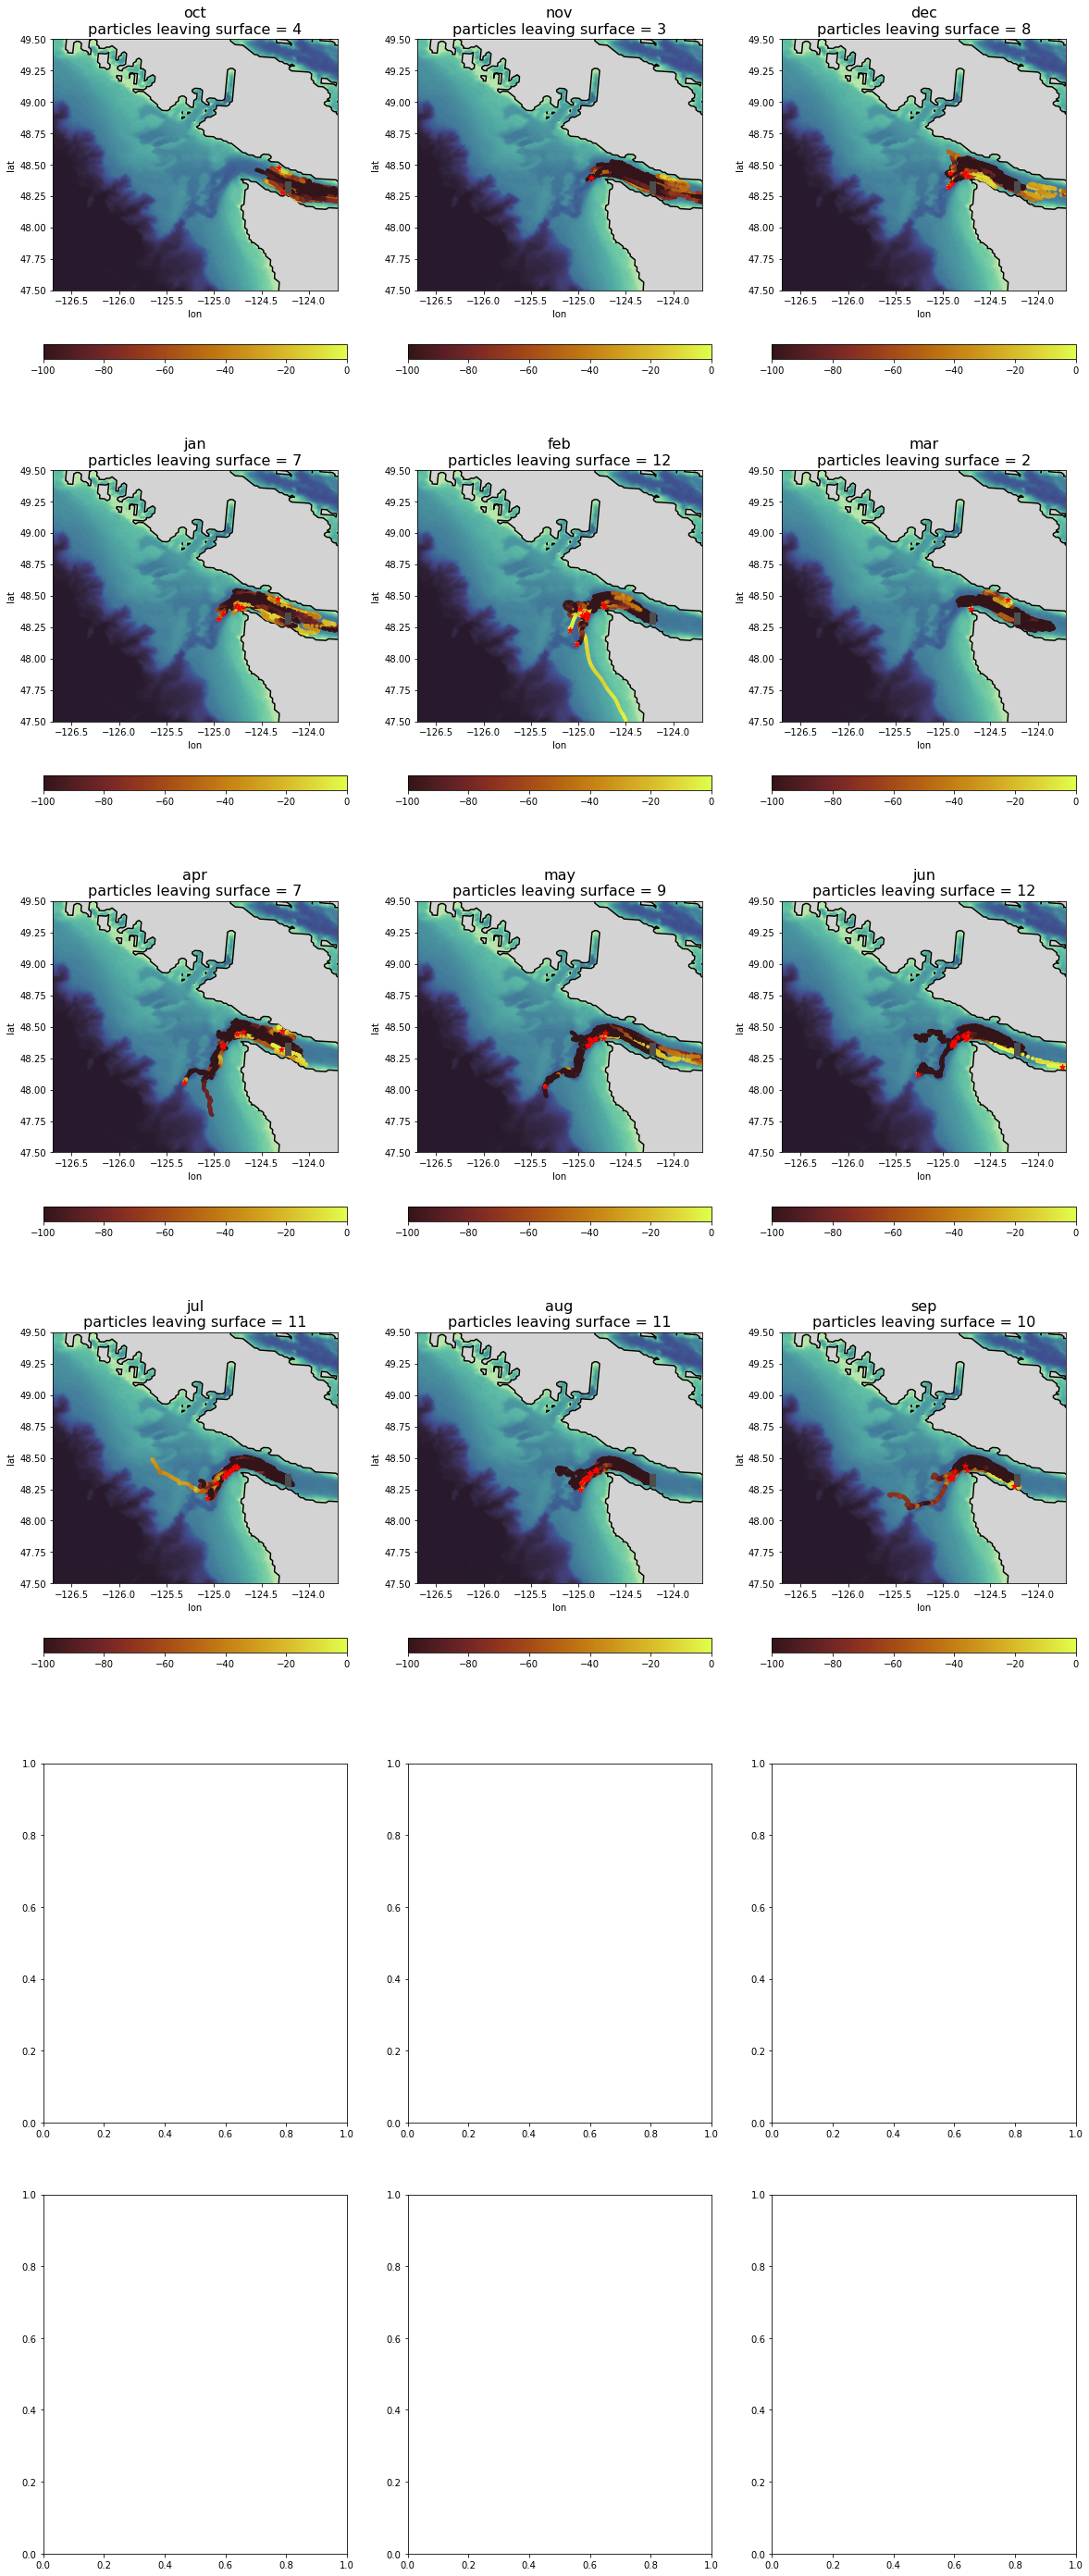

In [4]:
fig, ax = plt.subplots(6,3,figsize=(20, 50))

plt_qual_2D('oct', 16, ax[0,0])
plt_qual_2D('nov', 16, ax[0,1])
plt_qual_2D('dec', 16, ax[0,2])

plt_qual_2D('jan', 17, ax[1,0])
plt_qual_2D('feb', 17, ax[1,1])
plt_qual_2D('mar', 17, ax[1,2])
plt_qual_2D('apr', 17, ax[2,0])
plt_qual_2D('may', 17, ax[2,1])
plt_qual_2D('jun', 17, ax[2,2])
plt_qual_2D('jul', 17, ax[3,0])
plt_qual_2D('aug', 17, ax[3,1])
plt_qual_2D('sep', 17, ax[3,2])
# plt_qual_2D('oct', 17, ax[4,0])
# plt_qual_2D('nov', 17, ax[4,1])
# plt_qual_2D('dec', 17, ax[4,2])

# plt_qual_2D('jan', 18, ax[5,0])
# plt_qual_2D('feb', 18, ax[5,1])
# plt_qual_2D('mar', 18, ax[5,2])

### Note on run length
- the particles dont get that far in the 20 day runs not that we actually have everything setup "correctly" 
- not surprising though I guess since Saurav's results suggeste that about half of the particles take more than 150 to get to the JdF
- run for 150 days instead of 20, many particles in the winter will leave through the surface before then but that is fine

# plots of final position

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))

# Bathymetry
c = ax.contourf(
mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
cmap=cm.cm.gray_r, extend='max',zorder=0,
)
    
# "Mapping"
ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=2)
ax.set_xlim([-127.7, -122.7])
ax.set_ylim([46, 51])
ax.set_aspect(1/np.sin(np.deg2rad(49)))
ax.set_xlabel('lon')
ax.set_ylabel('lat')
# ax.set_title(month, fontsize=16)

n = 14 #number of particles being tracked

# months = ['nov16','dec16','jan17','feb17','mar17','apr17','may17','jun17','jul17','aug17','sep17','oct17','nov17','dec17','jan18','feb18','mar18']
months = ['oct16','nov16','dec16','jan17','feb17','mar17']
for j in range(len(months)):
    if months[j][:3] == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+months[j]+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+months[j]+'/ariane_trajectories_qualitative.nc')
    
    for i in range(n):
        if abs(file.traj_depth[479,i]-file.traj_depth[478,i])>0.001:
            scat = ax.scatter(file.traj_lon[479,i],file.traj_lat[479,i],c=j,cmap=cm.cm.phase, vmin= 0, vmax=len(months), marker='*', s=100, zorder=4)

cbar = fig.colorbar(scat,ax=ax, extend='max',label="month")
# cbar.ax.set_yticklabels([months[0],months[2],months[4],months[6],months[8],months[10],months[12],months[14],months[16]])
ax.scatter(file.traj_lon[0],file.traj_lat[0],color='r',marker='s', zorder=4) # start location

# Boundary Selection

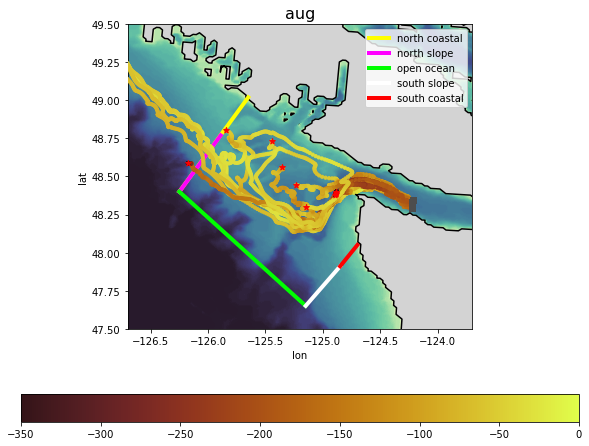

In [5]:
# summer boundaries
fig, ax = plt.subplots(figsize=(10,8))
plt_qual_2D('aug',17, ax)
ax.plot([-126.25,-125.65],[48.4,49.02], c='yellow', linewidth=4, label='north coastal')
ax.plot([-126.25,-125.89],[48.4,48.77], c='magenta',linewidth=4, label='north slope')
ax.plot([-126.25,-125.15],[48.4,47.65], c='lime',linewidth=4, label='open ocean')
ax.plot([-124.85,-125.15],[47.91,47.65], c='w',linewidth=4, label='south slope')
ax.plot([-124.7,-124.85],[48.05,47.91], c='r',linewidth=4, label='south coastal')
ax.legend()

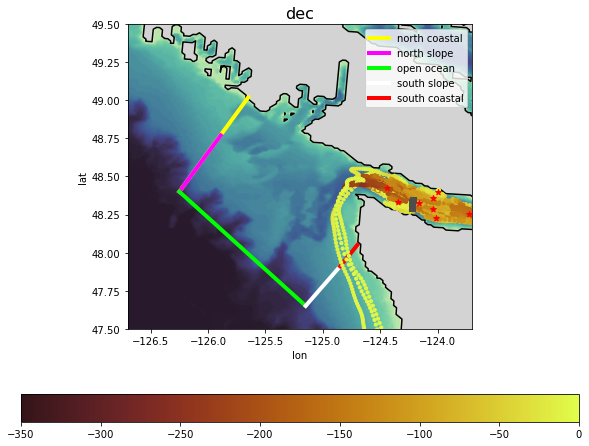

In [9]:
# winter boundaries
fig, ax = plt.subplots(figsize=(10,8))
plt_qual_2D('dec',17, ax)

#boundary lines

ax.plot([-126.25,-125.65],[48.4,49.02], c='yellow', linewidth=4, label='north coastal')
ax.plot([-126.25,-125.89],[48.4,48.77], c='magenta',linewidth=4, label='north slope')
ax.plot([-126.25,-125.15],[48.4,47.65], c='lime',linewidth=4, label='open ocean')
ax.plot([-124.85,-125.15],[47.91,47.65], c='w',linewidth=4, label='south slope')
ax.plot([-124.7,-124.85],[48.05,47.91], c='r',linewidth=4, label='south coastal')
ax.legend()

### based on previous conversations with Susan the winter boudnaries should be closer to shore, but based on what i'm seeing for the qualitative run I don't an incredibly strong case for needing this!

## same hting but in i,j space

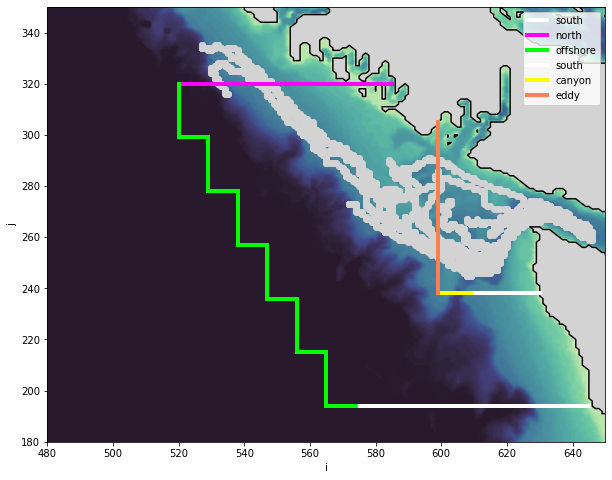

In [10]:
# Summer (aug)

file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/backward_30aug17/ariane_trajectories_qualitative.nc')

fig, ax = plt.subplots(figsize=(10,8))

#Depth
c = ax.contourf(
mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
cmap=cm.cm.deep, extend='max',
)
    
#.. everything else
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([480, 650])
ax.set_ylim([180,350])
ax.set_xlabel('i')
ax.set_ylabel('j')

#boundary lines
# outer (saurav):
ax.plot([574,645],[194,194], 'w',linewidth=4, label='south')
ax.plot([520,585],[320,320], 'magenta',linewidth=4, label='north')
ax.plot([520,520],[320,299], 'lime',linewidth=4, label='offshore')
ax.plot([529,520],[299,299], 'lime',linewidth=4)
ax.plot([529,529],[299,278], 'lime',linewidth=4)
ax.plot([529,538],[278,278], 'lime',linewidth=4)
ax.plot([538,538],[257,278], 'lime',linewidth=4)
ax.plot([547,538],[257,257], 'lime',linewidth=4)
ax.plot([547,547],[257,236], 'lime',linewidth=4)
ax.plot([547,556],[236,236], 'lime',linewidth=4)
ax.plot([556,556],[215,236], 'lime',linewidth=4)
ax.plot([565,556],[215,215], 'lime',linewidth=4)
ax.plot([565,565],[215,194], 'lime',linewidth=4)
ax.plot([565,574],[194,194], 'lime',linewidth=4)
# inner (susan):
ax.plot([609,630],[238,238], 'w',linewidth=4, label='south')
ax.plot([609,599],[238,238], 'yellow',linewidth=4, label='canyon')
ax.plot([599,599],[238,305], 'coral',linewidth=4, label='eddy')

ax.legend()

n = 14
for p in range(n):
    lat = file.traj_lat[:,p]
    lon = file.traj_lon[:,p]
    ind = [np.unravel_index(np.argmin([np.abs(mesh.nav_lon - lon[i])+np.abs(mesh.nav_lat - lat[i])], axis=None), mesh.nav_lon.shape) for i in range(480)]
    ind = np.asarray(ind)
    ax.scatter(ind[:,1],ind[:,0],c='lightgrey')

## which way are the particles moving in the JdF Eddy?

In [25]:
file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/backward_30jul17/ariane_trajectories_qualitative.nc')

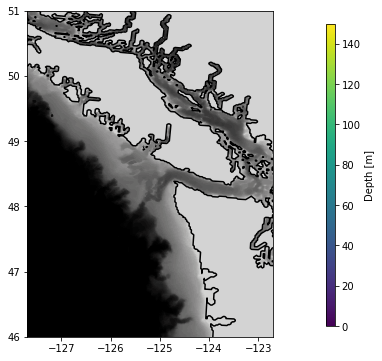

In [26]:
# Make initial animation figure
fig, ax = plt.subplots(figsize=(6, 6))
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
l = ax.scatter([], [], s=50, c=[], vmin=0, vmax=150, edgecolor='k')
t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-127.7, -122.7])
ax.set_ylim([46, 51])
ax.set_aspect(1/np.sin(np.deg2rad(49)))
fig.colorbar(l, cax=cax, label='Depth [m]')
c = ax.contourf(
mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
cmap=cm.cm.gray_r, extend='max',zorder=0,
)

# Init function
def init():
    t.set_text('')
    l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l, t,

# Animate function
def animate(hour):
    l.set_offsets(np.vstack([file.traj_lon[hour,:], file.traj_lat[hour,:]]).T)
    l.set_array(file.traj_depth[hour,:]*-1)
    return l,t ,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=480, interval=100, blit=True)

In [27]:
HTML(anim.to_html5_video())

## tracks with density instead of depth

In [5]:
def plt_dens_2D(month, year, ax):
    
    n = 14 #number of particles being tracked
    
    if month == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    
    # Bathymetry
    c = ax.contourf(
    mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.deep, extend='max',zorder=0,
    )
    
    # "Mapping"
    ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
    ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=2)
    ax.set_xlim([-126.7, -123.7])
    ax.set_ylim([47.5, 49.5])
    ax.set_aspect(1/np.sin(np.deg2rad(49)))
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
#     ax.set_title(month+' '+str(year), fontsize=16)
    
    # Particle trajectories and depth
    im = ax.scatter(file.traj_lon,file.traj_lat, c=file.traj_dens,vmin=23, vmax=28,cmap=cm.cm.amp, s=10,zorder=3)
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal')
    ax.scatter(file.traj_lon[0],file.traj_lat[0],color='0.30',marker='s', zorder=4) # start location
    
    # End locations
    last_point= [pd.DataFrame(file.traj_lat[:,i]).last_valid_index() for i in range(n)]
    k=0
    for i in range(n):
        if last_point[i] < len(file.traj_lat)-2:
            k+=1
            ax.scatter(file.traj_lon[last_point[i],i],file.traj_lat[last_point[i],i],color='r',marker='*', zorder=4)
            
    ax.set_title(month + "\nparticles leaving surface = "+str(k), fontsize=16)

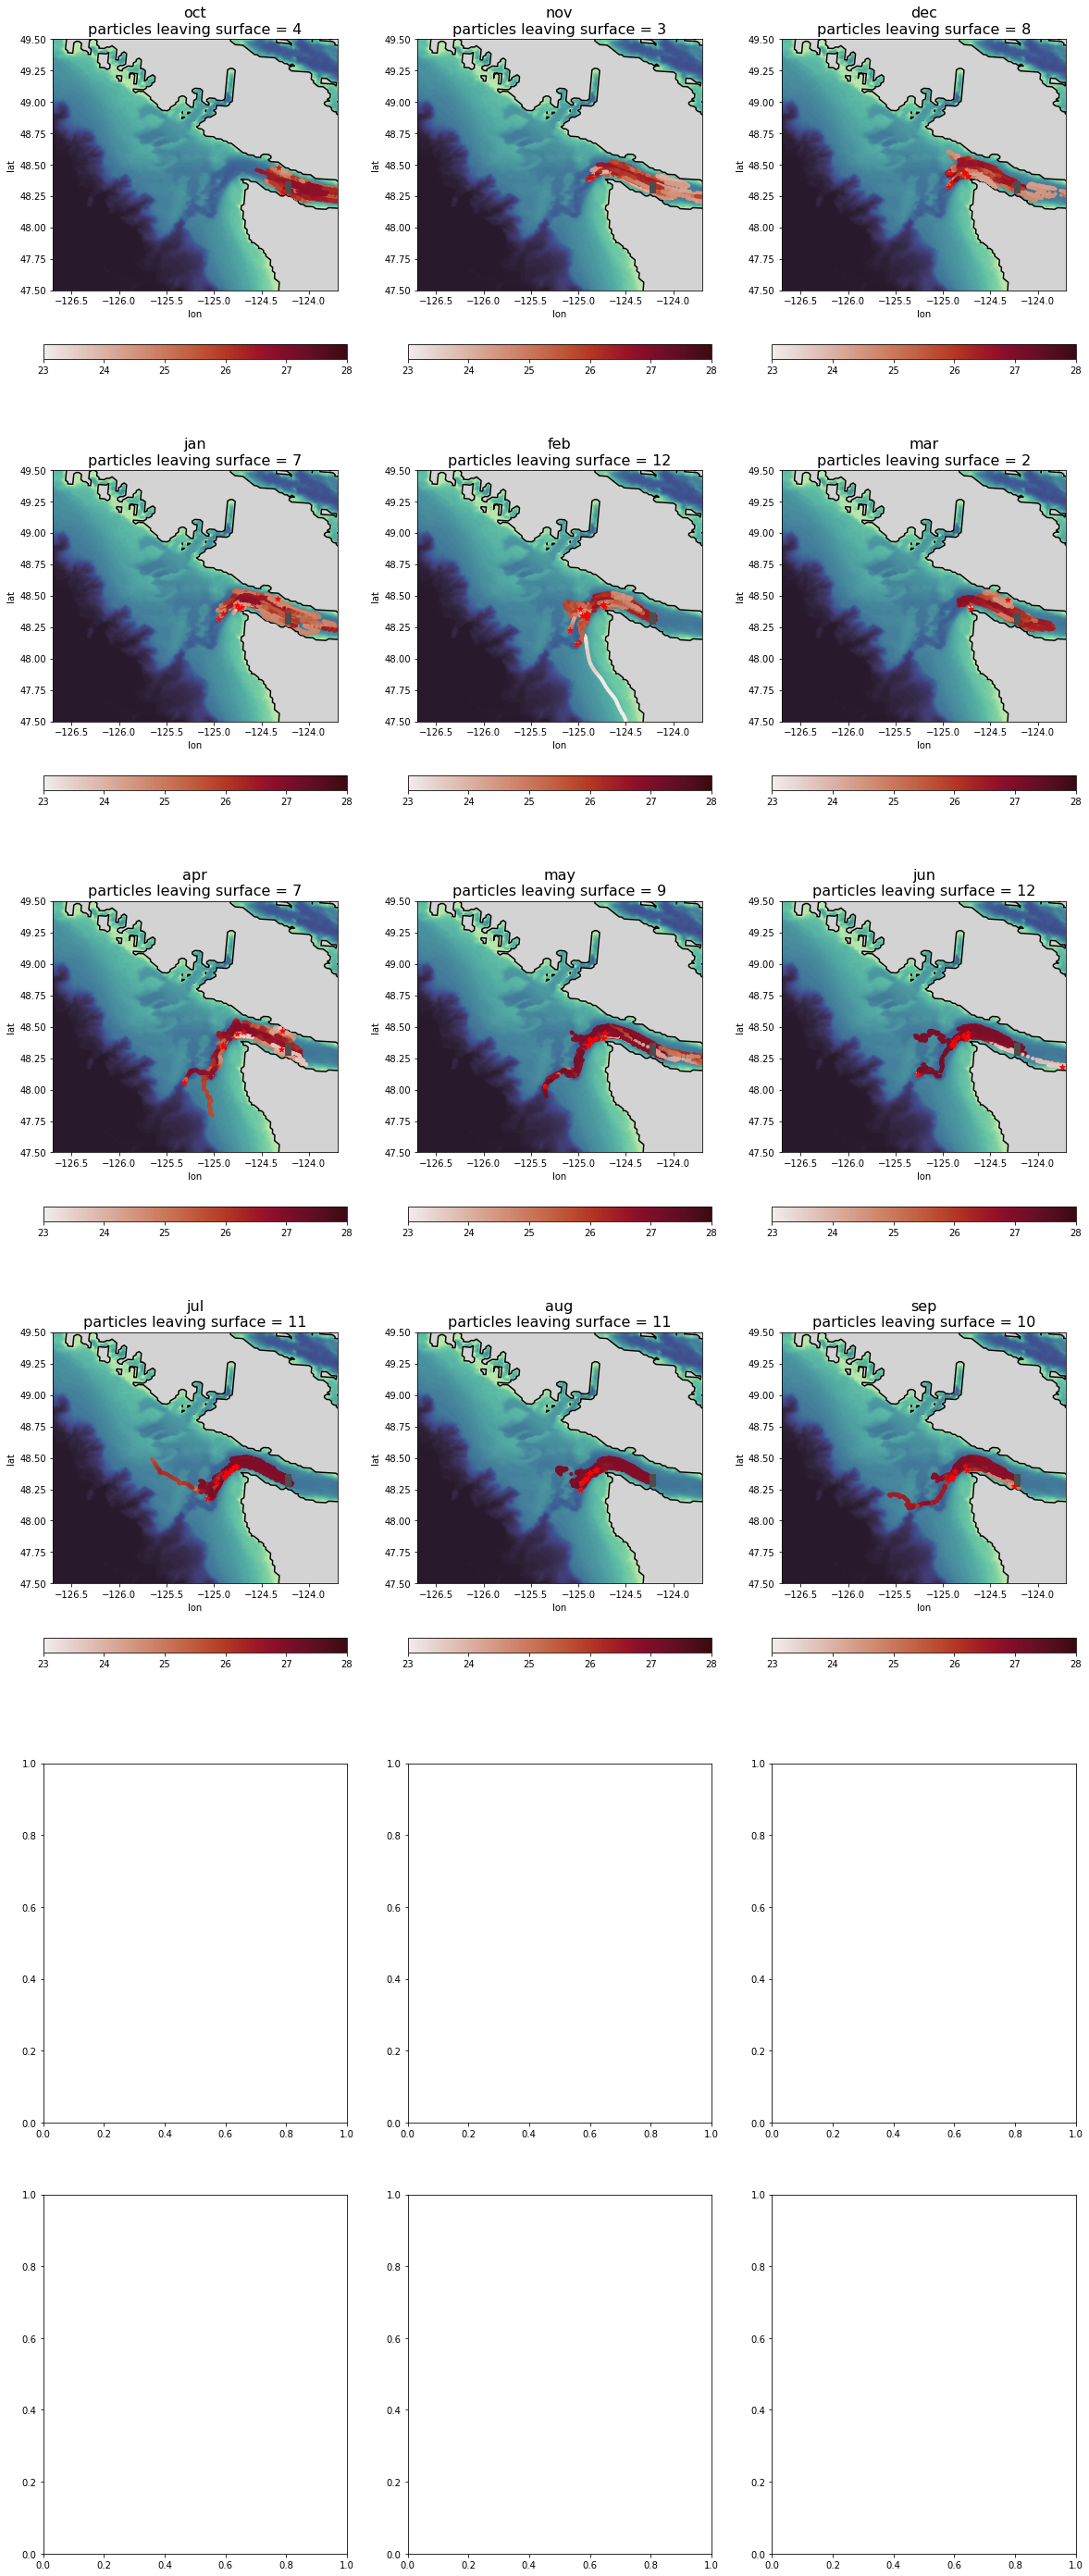

In [6]:
fig, ax = plt.subplots(6,3,figsize=(20, 50))

plt_dens_2D('oct', 16, ax[0,0])
plt_dens_2D('nov', 16, ax[0,1])
plt_dens_2D('dec', 16, ax[0,2])

plt_dens_2D('jan', 17, ax[1,0])
plt_dens_2D('feb', 17, ax[1,1])
plt_dens_2D('mar', 17, ax[1,2])
plt_dens_2D('apr', 17, ax[2,0])
plt_dens_2D('may', 17, ax[2,1])
plt_dens_2D('jun', 17, ax[2,2])
plt_dens_2D('jul', 17, ax[3,0])
plt_dens_2D('aug', 17, ax[3,1])
plt_dens_2D('sep', 17, ax[3,2])
# plt_dens_2D('oct', 17, ax[4,0])
# plt_dens_2D('nov', 17, ax[4,1])
# plt_dens_2D('dec', 17, ax[4,2])

# plt_dens_2D('jan', 18, ax[5,0])
# plt_dens_2D('feb', 18, ax[5,1])
# plt_dens_2D('mar', 18, ax[5,2])

In [7]:
def plt_salt_2D(month, year, ax):
    
    n = 14 #number of particles being tracked
    
    if month == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    
    # Bathymetry
    c = ax.contourf(
    mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.deep, extend='max',zorder=0,
    )
    
    # "Mapping"
    ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
    ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=2)
    ax.set_xlim([-126.7, -123.7])
    ax.set_ylim([47.5, 49.5])
    ax.set_aspect(1/np.sin(np.deg2rad(49)))
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
#     ax.set_title(month+' '+str(year), fontsize=16)
    
    # Particle trajectories and depth
    im = ax.scatter(file.traj_lon,file.traj_lat, c=file.traj_salt,vmin=29, vmax=34,cmap=cm.cm.amp, s=10,zorder=3)
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal')
    ax.scatter(file.traj_lon[0],file.traj_lat[0],color='0.30',marker='s', zorder=4) # start location
    
    # End locations
    last_point= [pd.DataFrame(file.traj_lat[:,i]).last_valid_index() for i in range(n)]
    k=0
    for i in range(n):
        if last_point[i] < len(file.traj_lat)-2:
            k+=1
            ax.scatter(file.traj_lon[last_point[i],i],file.traj_lat[last_point[i],i],color='r',marker='*', zorder=4)
            
    ax.set_title(month + "\nparticles leaving surface = "+str(k), fontsize=16)

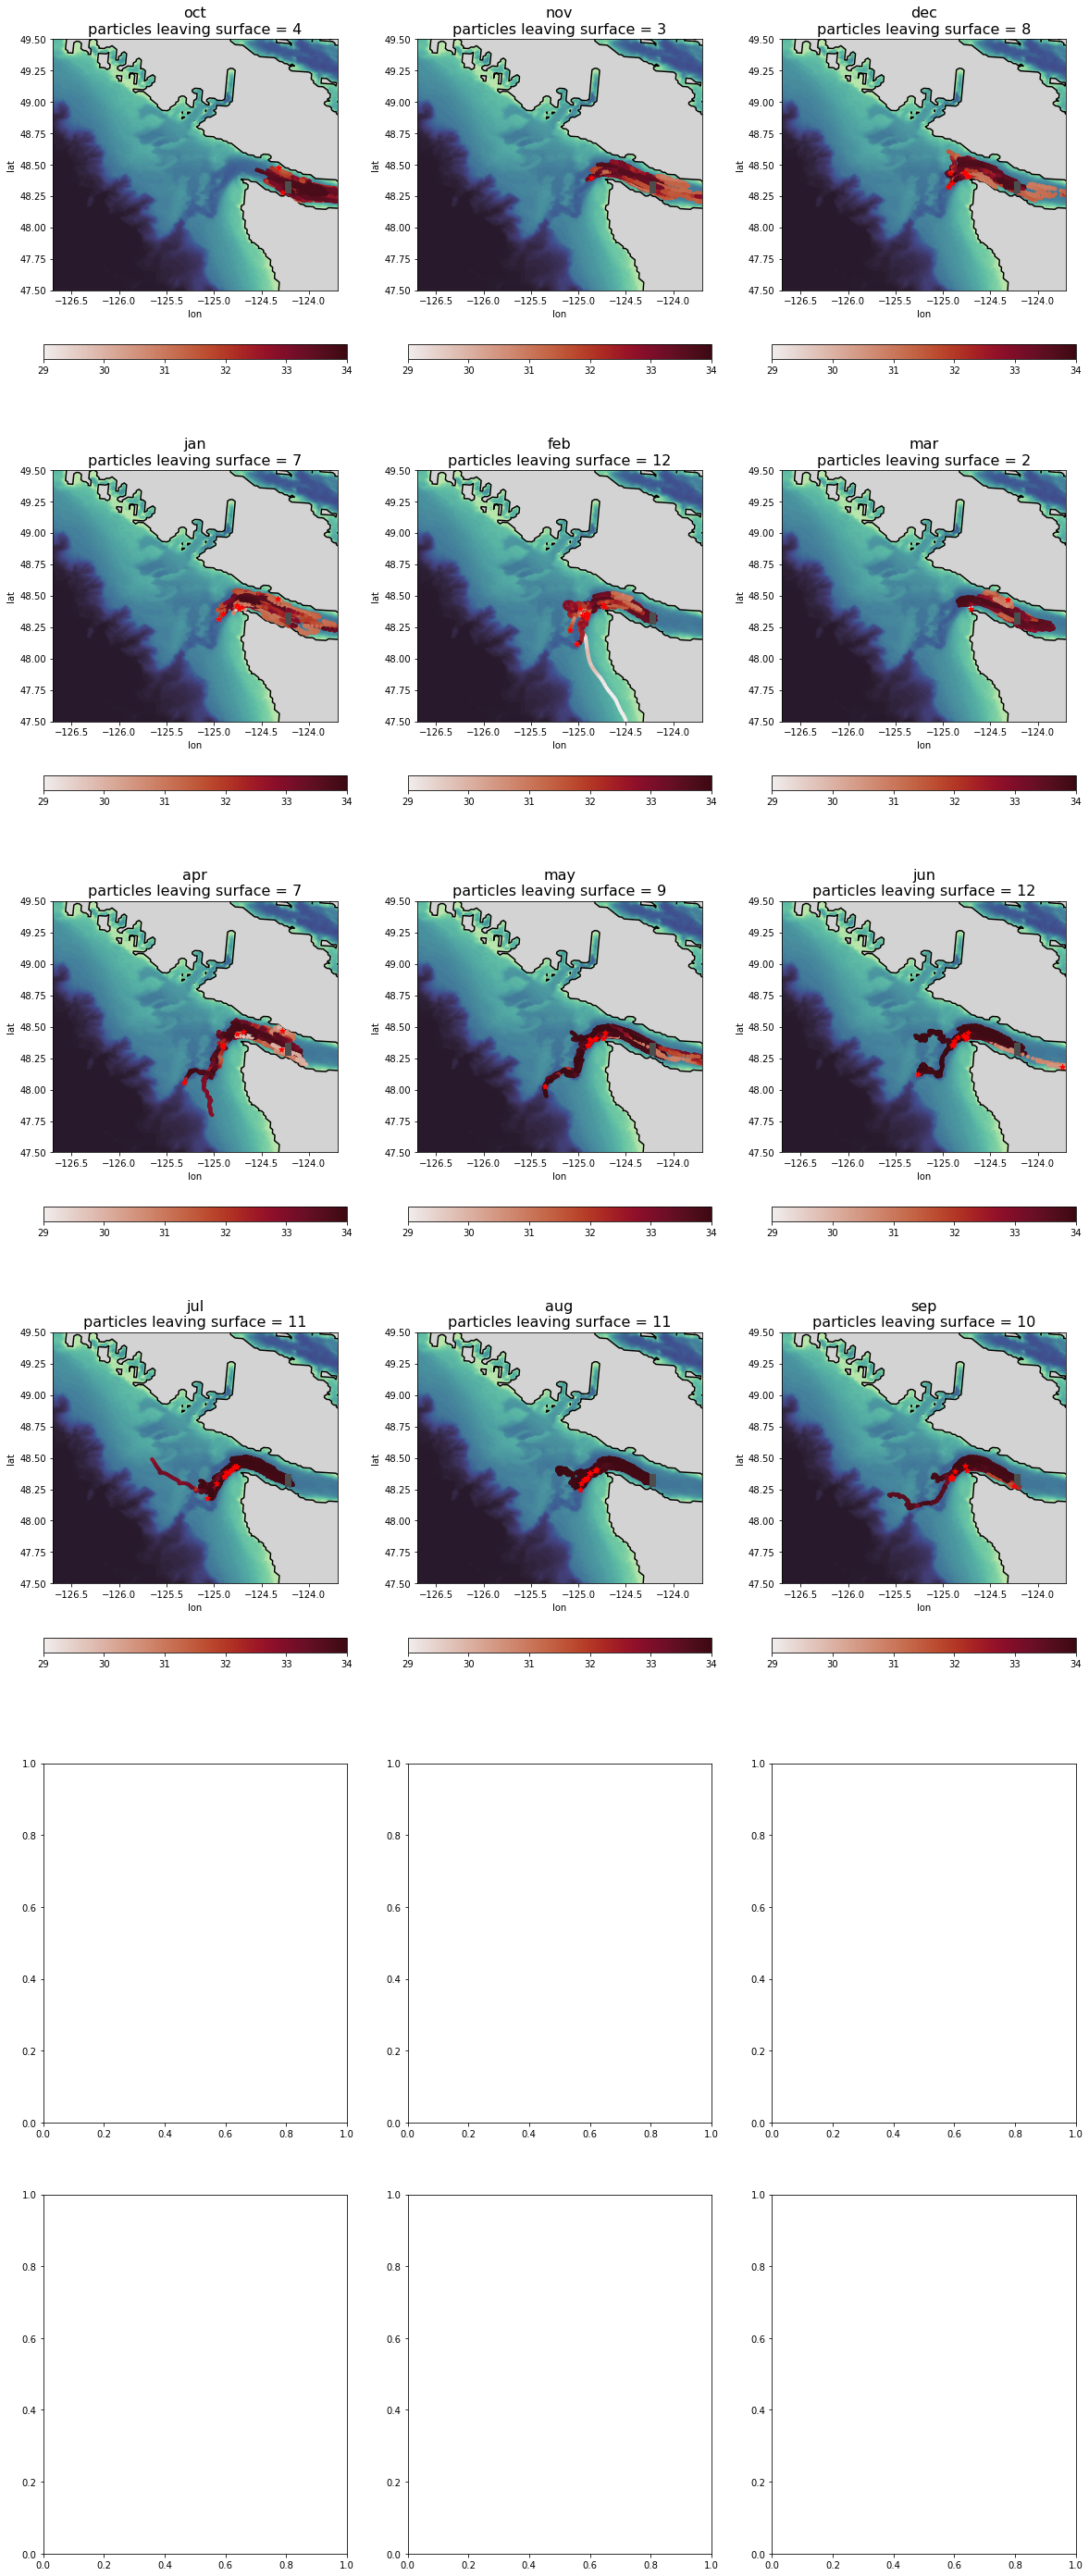

In [8]:
fig, ax = plt.subplots(6,3,figsize=(20, 50))

plt_salt_2D('oct', 16, ax[0,0])
plt_salt_2D('nov', 16, ax[0,1])
plt_salt_2D('dec', 16, ax[0,2])

plt_salt_2D('jan', 17, ax[1,0])
plt_salt_2D('feb', 17, ax[1,1])
plt_salt_2D('mar', 17, ax[1,2])
plt_salt_2D('apr', 17, ax[2,0])
plt_salt_2D('may', 17, ax[2,1])
plt_salt_2D('jun', 17, ax[2,2])
plt_salt_2D('jul', 17, ax[3,0])
plt_salt_2D('aug', 17, ax[3,1])
plt_salt_2D('sep', 17, ax[3,2])
# plt_salt_2D('oct', 17, ax[4,0])
# plt_salt_2D('nov', 17, ax[4,1])
# plt_salt_2D('dec', 17, ax[4,2])

# plt_salt_2D('jan', 18, ax[5,0])
# plt_salt_2D('feb', 18, ax[5,1])
# plt_salt_2D('mar', 18, ax[5,2])

In [10]:
# file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30jan17/ariane_trajectories_qualitative.nc')

In [11]:
# #weird gaps in density information due to gaps in salt or temperature information! 
# #make sure this isnt because of how your doing the temp and salinity calcs

# fig, ax = plt.subplots(4,1, figsize =(6,20))
# for i in range(4):
#     list=[0,2,3,6]
#     ax[i].scatter(file.traj_time[:,list[i]], file.traj_depth[:,list[i]]/-10,label='depth')
#     ax[i].scatter(file.traj_time[:,list[i]], file.traj_temp[:,list[i]],label='temp')
#     ax[i].scatter(file.traj_time[:,list[i]], file.traj_salt[:,list[i]],label='salt')
#     ax[i].scatter(file.traj_time[:,list[i]], file.traj_dens[:,list[i]], label='dens')
#     ax[i].legend()

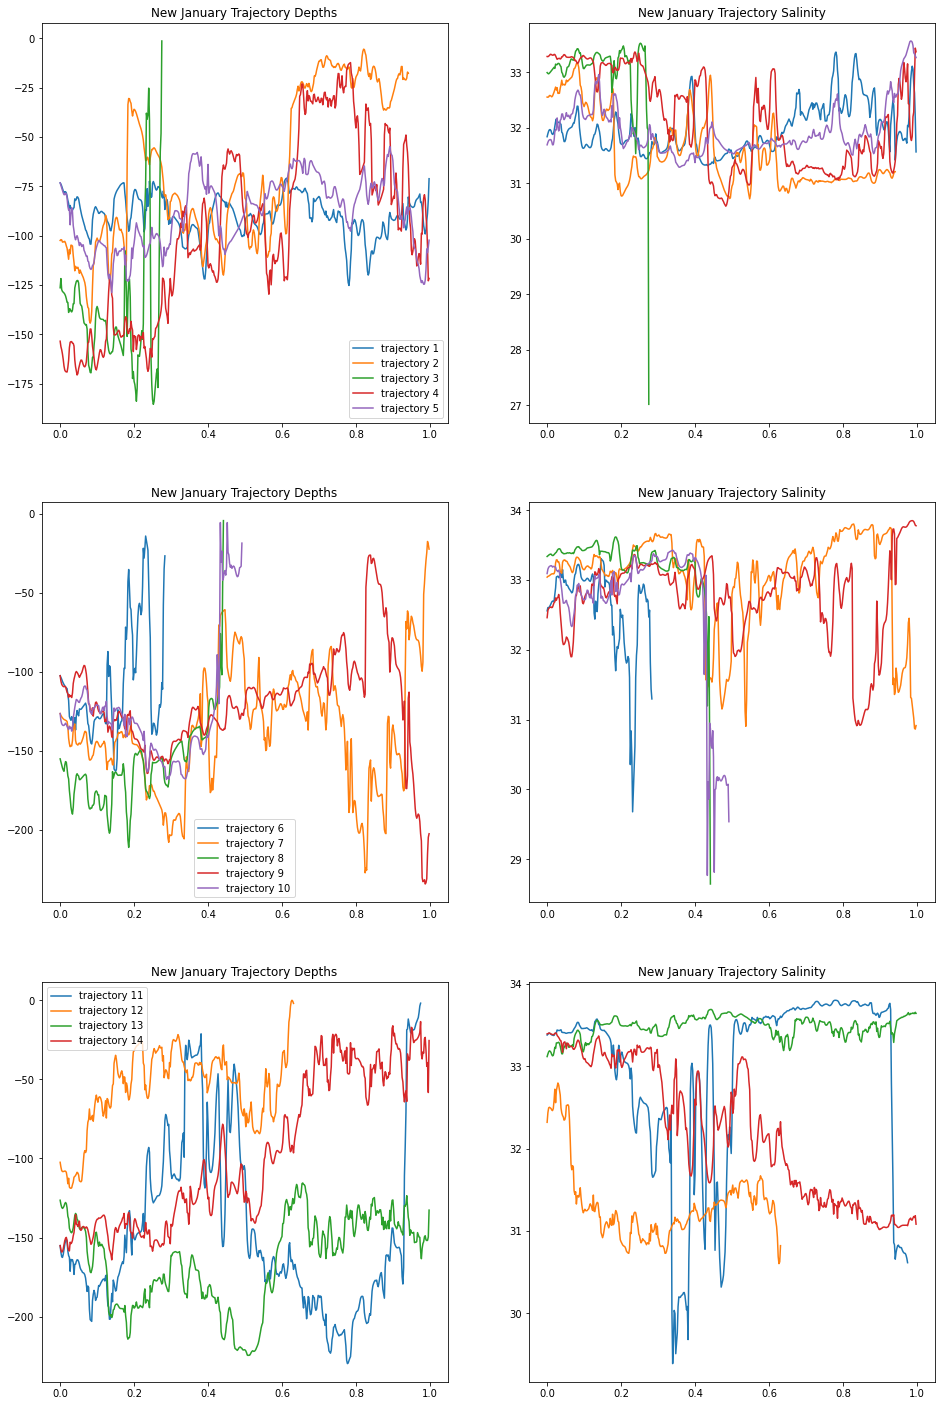

In [16]:
file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30jan17/ariane_trajectories_qualitative.nc')

fig, ax = plt.subplots(3,2, figsize =(16,25))

for i in range(5):
    ax[0,0].plot(file.traj_time[:,i], file.traj_depth[:,i],label='trajectory '+str(i+1))
    ax[0,1].plot(file.traj_time[:,i], file.traj_salt[:,i]
                 , label='trajectory '+str(i+1))
    ax[0,0].legend()
    ax[0,0].set_title('New January Trajectory Depths')
    ax[0,1].set_title('New January Trajectory Salinity')

for i in range(5,10):
    ax[1,0].plot(file.traj_time[:,i], file.traj_depth[:,i],label='trajectory '+str(i+1))
    ax[1,1].plot(file.traj_time[:,i], file.traj_salt[:,i], label='trajectory '+str(i+1))
    ax[1,0].legend()
    ax[1,0].set_title('New January Trajectory Depths')
    ax[1,1].set_title('New January Trajectory Salinity')
    

for i in range(10,14):
    ax[2,0].plot(file.traj_time[:,i], file.traj_depth[:,i],label='trajectory '+str(i+1))
    ax[2,1].plot(file.traj_time[:,i], file.traj_salt[:,i], label='trajectory '+str(i+1))
    ax[2,0].legend()
    ax[2,0].set_title('New January Trajectory Depths')
    ax[2,1].set_title('New January Trajectory Salinity')

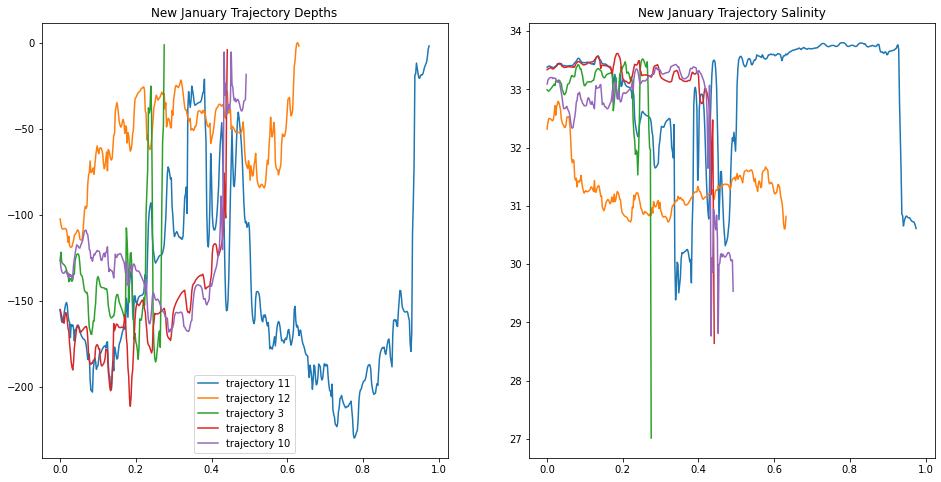

In [24]:
# January 2017 - jsut trajectories that leave the surface

leavers = [10,11,2,7,9]

fig, ax = plt.subplots(1,2, figsize =(16,8))

for i in leavers:
    ax[0].plot(file.traj_time[:,i], file.traj_depth[:,i],label='trajectory '+str(i+1))
    ax[1].plot(file.traj_time[:,i], file.traj_salt[:,i], label='trajectory '+str(i+1))
    ax[0].legend()
    ax[0].set_title('New January Trajectory Depths')
    ax[1].set_title('New January Trajectory Salinity')

In [9]:
# # looks like particles 2,7,9,10,12,13 end prematurely in both months - lets plot where these are located in the CS 
# nc_file = "/ocean/rbeutel/data/201712/U_new_20171201.nc"
# nc_to_plot = nc.Dataset(nc_file)
# mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# # hours = [0, 3, 6, 12, 15, 18, 21, 24]
# hours = [0]

# variable = 'vozocrtx'
# fig, ax= plt.subplots(nrows=1, ncols=1, figsize =(8,8))

# igrid = 646-1
# latS = 255
# latN = 275
# k = 0

# for hour in hours:
#     data = nc_to_plot[variable][hour,:,latS:latN,igrid]
#     # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
#     section_slice = np.arange(latS,latN)
#     zlevels = mesh_nc['gdept_1d'][:][0]
#     X, Y = np.meshgrid(section_slice, zlevels)
#     tmesh = ax.pcolormesh(X,Y,data, cmap = cm.cm.balance, \
#                           vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))

#     ax.set_ylim([0,240])
#     ax.invert_yaxis()
#     ax.set_ylabel('Depth [m]')
#     ax.set_xlabel('jgrid')
    
#     cbar = fig.colorbar(tmesh, ax=ax, orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
#     cbar.set_label(label=' U velocity [m/s]') 
    
#     ax.scatter([260,260,260,260,261.2,261.2,261.2,261.2,262.4,262.4,262.4,263.6,263.6,263.6],[80,105,130,155,80,105,130,155,105,130,155,105,130,155],c='k')
#     ax.scatter([260],[105], c='r', s= 100,label='2')
#     ax.scatter([260],[130], c='r', s= 100,label='3')
#     ax.scatter([261.2],[80], c='r', s= 100,label='5')
#     ax.scatter([261.2],[105], c='r', s= 100,label='6')
#     ax.scatter([261.2],[155], c='r', s= 100,label='8')
#     ax.scatter([262.4],[130], c='r', s= 100,label='10')
#     ax.scatter([262.4],[155], c='r', s= 100,label='11')
#     ax.scatter([263.6],[155], c='r', s= 100,label='14')
#     ax.legend()
    
# plt.tight_layout()
# # 25,22,27,29 = 80,105,130,155
# # ax[1].scatter([261,261,261,263.5,263.5,263.5,263.5,266,266,266],[90,120,150, 90,120, 150, 180, 90, 120, 150],c='k')